In [60]:
import numpy as np
import pandas as pd

# **DATA IMPORT & PREPROCESSING**

In [61]:
# Preprocessing for topic modeling result
def tp_preprocessing(tp, type_check):
    tp_df = tp
    cn = tp_df['cmp']
    
    for i, val in enumerate(cn):
        if '(주)' in val:
            tmp = val.replace('(주)','')
            tp_df.loc[i,'cmp'] = tmp
    
    col_list = list(tp_df.columns)
    col_list[0] = 'company_name'
    for i in range(1, len(tp_df.columns)):
        if type_check == 'adv':
            col_list[i] = 'adv_topic ' + str(col_list[i])
        if type_check == 'dadv':
            col_list[i] = 'dadv_topic ' + str(col_list[i])
    tp_df.columns = col_list

    return tp_df

In [62]:
# Preprocessing for financial variable
def fv_preprocessing(fv):
  fv_df = fv
  afv = fv_df['average_salary']
  tfv = fv_df['total_sale']

  for i, val in enumerate(afv):
    if '만원' in val:
      tmp = int(val[:-2].replace(',',''))
      fv_df.loc[i,'average_salary'] = tmp
    if '회사' in val:
      fv_df.loc[i,'average_salary'] = np.NAN
    if '수집' in val:
      fv_df.loc[i,'average_salary'] = np.NAN


  for i, val in enumerate(tfv):
    if '조원' in val:
      tmp = float(val[:-2].replace(',',''))*1000
      fv_df.loc[i,'total_sale'] = tmp
    if '억원' in val:
      tmp = float(val[:-2].replace(',',''))
      fv_df.loc[i,'total_sale'] = tmp
    if '회사' in val:
      fv_df.loc[i,'total_sale'] = np.NAN


  
  return fv_df

In [63]:
# Preprocessing for turn over rate
def tor_preprocessing(tor):
  tor_df = tor
  tor_val = tor_df['turn_over_rate']

  for i, val in enumerate(tor_val):
    if '정보' in val:
      tor_df.loc[i,'turn_over_rate'] = np.NAN
    elif val == '(9999%)' :
      tor_df.loc[i,'turn_over_rate'] = np.NAN
    elif '(' in val:
      tmp = float(val[1:-1].replace('%',''))*0.01
      tor_df.loc[i,'turn_over_rate'] = tmp

  return tor_df

In [64]:
tp_adv = pd.read_csv("input/topic_modeling_result/bank_adv_topic_modeling.csv")
tp_dadv = pd.read_csv("input/topic_modeling_result/bank_dadv_topic_modeling.csv")

fv = pd.read_csv("input/financial_variable/bank_financial_financial_variable.csv")
tor = pd.read_csv("input/turn_over_rate/bank_financial_business_turn_over_rate.csv")

In [65]:
tp_adv = tp_adv.drop(['Unnamed: 0'], axis=1)
tp_adv = tp_preprocessing(tp_adv,'adv')
tp_dadv = tp_dadv.drop(['Unnamed: 0'], axis=1)
tp_dadv = tp_preprocessing(tp_dadv,'dadv')
fv = fv.drop(['Unnamed: 0'], axis=1)
fv = fv_preprocessing(fv)
tor = tor.drop(['Unnamed: 0'], axis=1)
tor = tor_preprocessing(tor)

In [66]:
df = pd.merge(tp_adv, tp_dadv, on = 'company_name', how = 'inner')
df = pd.merge(df, fv, on = 'company_name', how = 'inner')
df = pd.merge(df, tor, on = 'company_name', how = 'inner')
df = df.dropna()
df['average_salary'] = pd.to_numeric(df['average_salary'])
df['total_sale'] = pd.to_numeric(df['total_sale'])

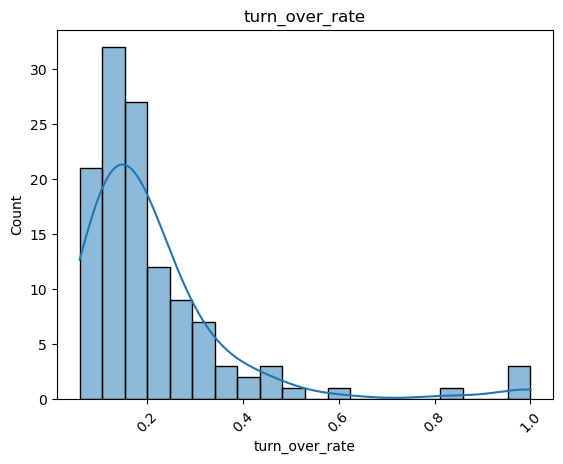

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('turn_over_rate')
plt.xticks(rotation = 45)
sns.histplot(df['turn_over_rate'],kde=True)
plt.show()


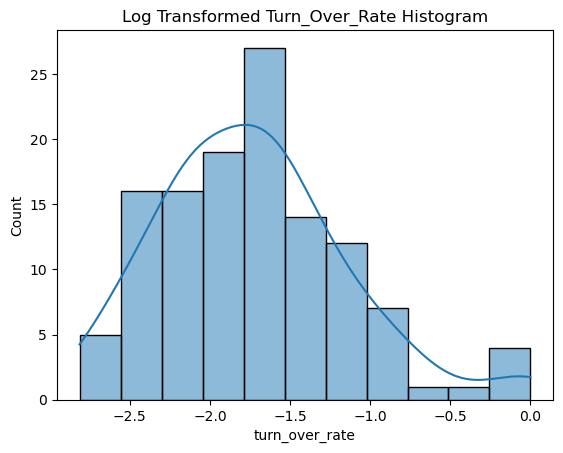

In [68]:
plt.title('Log Transformed Turn_Over_Rate Histogram')
log_tor = np.log(df['turn_over_rate'].astype('float'))
sns.histplot(log_tor,kde=True)
plt.show()

In [69]:
# original_tor = df['turn_over_rate']
# df['turn_over_rate'] = log_tor = np.log(df['turn_over_rate'].astype('float'))
df

,company_name,adv_topic 0,adv_topic 1,adv_topic 2,adv_topic 3,adv_topic 4,adv_topic 5,dadv_topic 0,dadv_topic 1,dadv_topic 2,dadv_topic 3,dadv_topic 4,average_salary,total_sale,turn_over_rate
0,국민건강보험공단,0.000000,0.999386,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999572,6441,75400.0,0.2
1,근로복지공단,0.000000,0.999270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999492,5817,9406.2,0.13
3,농협은행,0.000000,0.000000,0.000000,0.260527,0.000000,0.738698,0.181343,0.000000,0.000000,0.000000,0.812849,6182,13100.0,0.15
4,현대카드,0.000000,0.433746,0.000000,0.565337,0.000000,0.000000,0.000000,0.999159,0.000000,0.000000,0.000000,8737,2300.0,0.35
5,중소기업은행,0.000000,0.010276,0.000000,0.000000,0.000000,0.988675,0.000000,0.012572,0.040652,0.000000,0.946242,10065,14800.0,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,바로크레디트대부,0.015249,0.923682,0.015247,0.015275,0.015289,0.015258,0.000000,0.000000,0.970678,0.000000,0.000000,4354,1133.0,0.22
139,글로벌금융판매,0.000000,0.000000,0.000000,0.000000,0.990223,0.000000,0.000000,0.000000,0.000000,0.996440,0.000000,3442,4473.3,0.46
140,현대하이카손해사정,0.973719,0.000000,0.000000,0.000000,0.000000,0.000000,0.317989,0.000000,0.000000,0.000000,0.664502,6082,1294.9,0.08
141,아이비케이캐피탈,0.000000,0.000000,0.000000,0.000000,0.000000,0.992217,0.000000,0.000000,0.000000,0.899822,0.093894,9880,3933.2,0.06


# **MACHINE LEARNING MODEL**

**Linear, Ridge, Lasso**

In [70]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, ' RMSE: ', np.round(rmse,3))
    return rmse

In [71]:
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [72]:
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

y_target = df['turn_over_rate']
x_data = df.drop(['company_name','turn_over_rate'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.2, random_state = 7)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)


LinearRegression  RMSE:  0.16
Ridge  RMSE:  0.107
Lasso  RMSE:  0.112


[0.16007498573990542, 0.10659270193391686, 0.11196050289529533]

In [73]:
def get_top_bottom_coef(model, n=4):

    coef = pd.Series(model.coef_, index=x_data.columns)

    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)

    return coef_high, coef_low

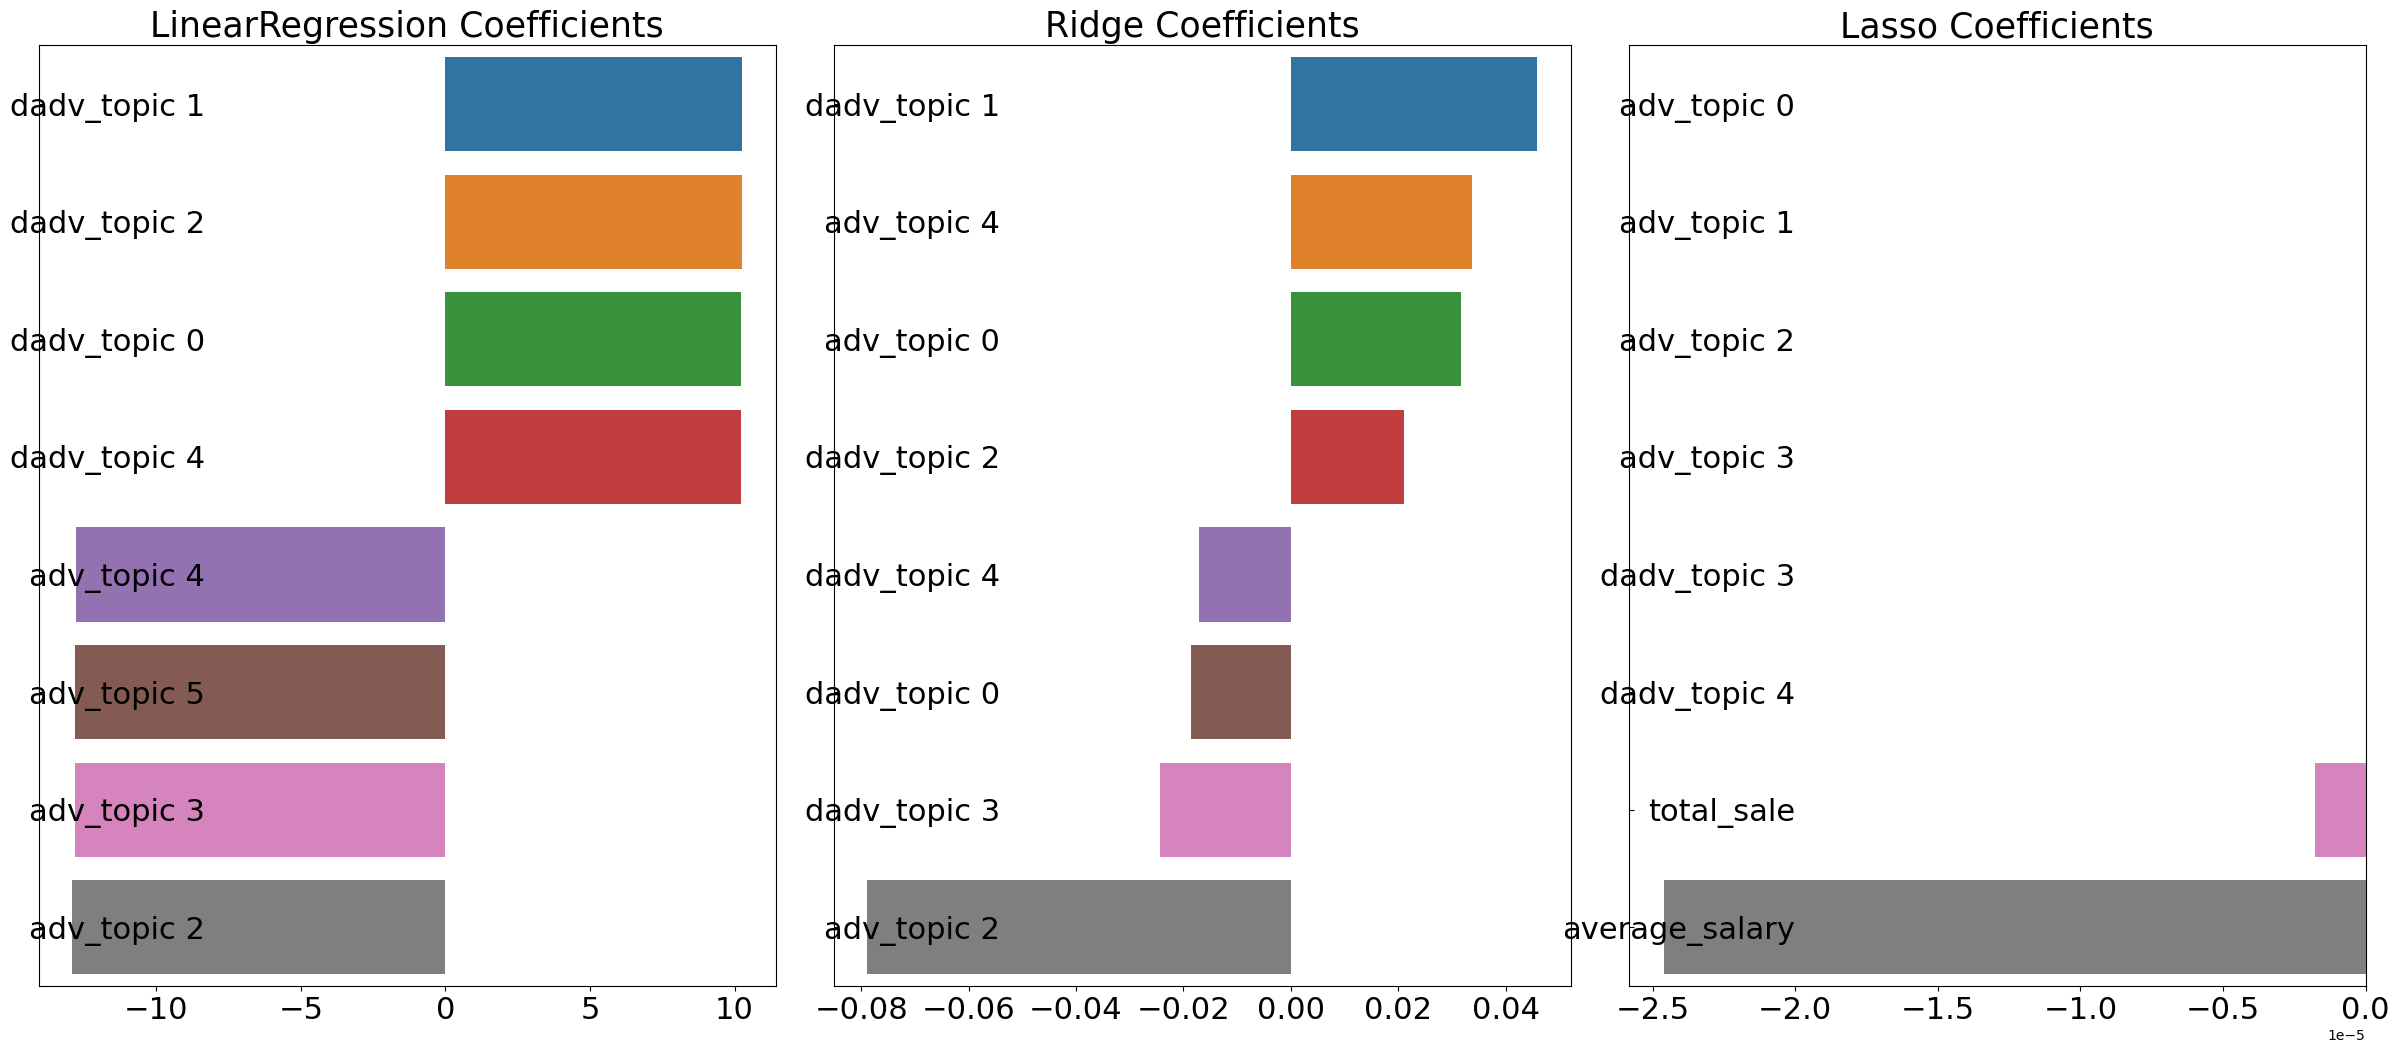

In [74]:
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize = (24,10), nrows = 1, ncols= 3)
    fig.tight_layout()

    for i_num, model in enumerate(models):

        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])

        axs[i_num].set_title(model.__class__.__name__+' Coefficients', size=25)
        axs[i_num].tick_params(axis="y", direction="in",pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax = axs[i_num])

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [75]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):

    for model in models:

        rmse_list = np.sqrt(-cross_val_score(model, x_data, y_target,
                                             scoring= 'neg_mean_squared_error', cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE Value List: {1}'.format(model.__class__.__name__, np.round(rmse_list,3)))
        print('\n{0} CV average RMSE Value List: {1}'.format(model.__class__.__name__, np.round(rmse_avg,3)))

models = [ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


Ridge CV RMSE Value List: [0.08  0.118 0.21  0.174 0.193]

Ridge CV average RMSE Value List: 0.155

Lasso CV RMSE Value List: [0.077 0.102 0.208 0.162 0.189]

Lasso CV average RMSE Value List: 0.148


In [76]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(x_data,y_target.astype(float))
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} After 5 CV, best average RMSE: {1}, best alpha: {2}'.format(model.__class__.__name__,
                                                                           np.round(rmse,4),grid_model.best_params_))

ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge After 5 CV, best average RMSE: 0.1574, best alpha: {'alpha': 20}
Lasso After 5 CV, best average RMSE: 0.156, best alpha: {'alpha': 5}


LinearRegression  RMSE:  0.16
Ridge  RMSE:  0.109
Lasso  RMSE:  0.112


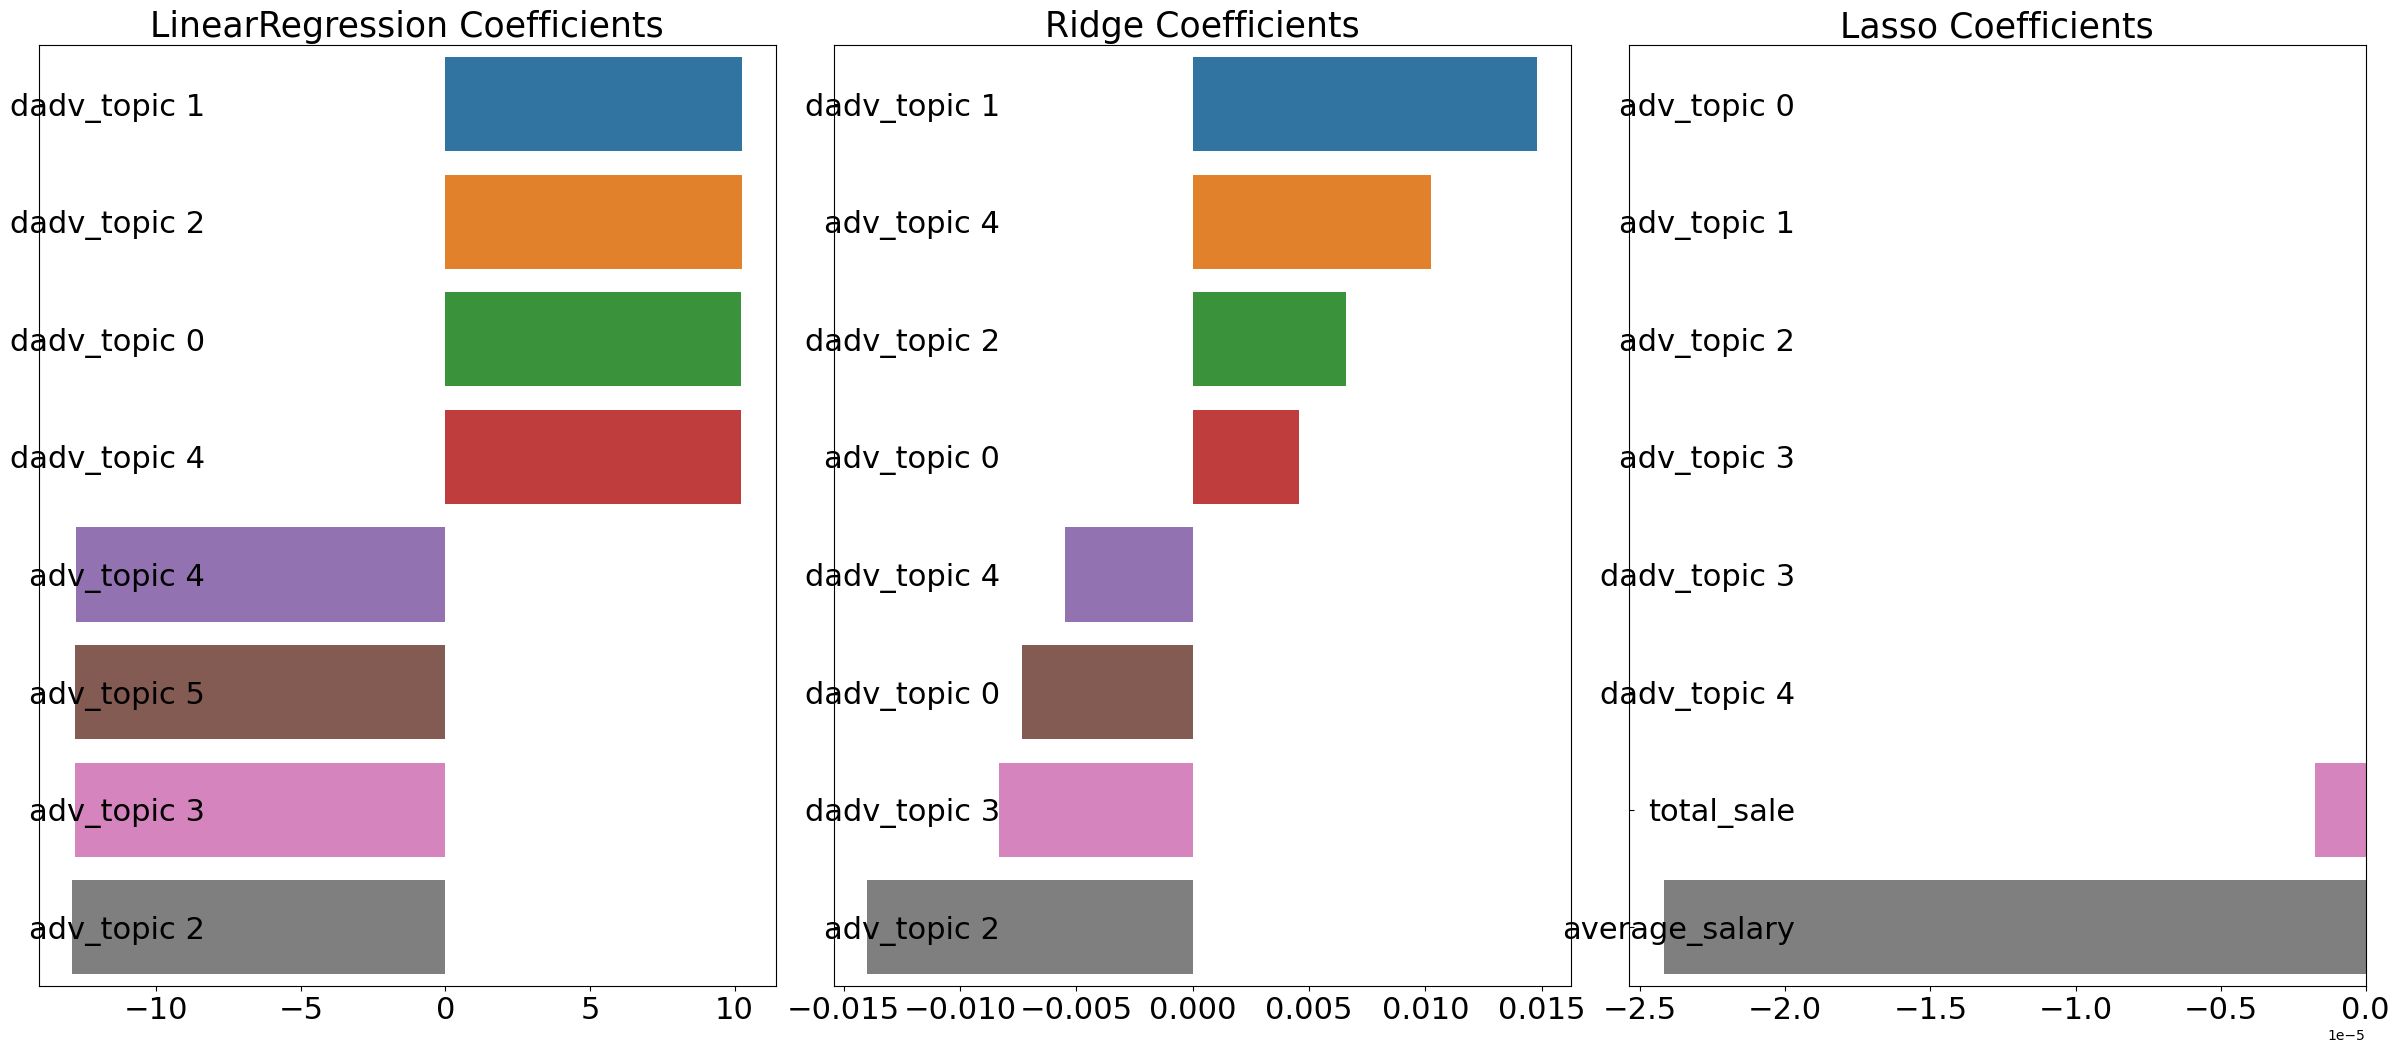

In [77]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=20)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=5)
lasso_reg.fit(X_train,y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

visualize_coefficient(models)

In [78]:
from scipy.stats import skew

feature_index = df.dtypes[df.dtypes != 'object'].index

skew_features = df[feature_index].apply(lambda x: skew(x))

skew_feature_top = skew_features[skew_features > 1]
print(skew_feature_top.sort_values(ascending=False))

adv_topic 2     5.373889
total_sale      4.540094
adv_topic 4     3.284244
adv_topic 0     2.995200
adv_topic 1     2.002146
dadv_topic 2    1.908131
dadv_topic 3    1.567450
dadv_topic 1    1.498051
dadv_topic 4    1.469057
dadv_topic 0    1.091960
dtype: float64


In [79]:
for feature in skew_feature_top.index:
    nonzero_indices = df[feature] != 0  # 0이 아닌 값의 인덱스를 찾음
    df.loc[nonzero_indices, feature] = np.log1p(df.loc[nonzero_indices, feature])

In [80]:
y_target = df['turn_over_rate']
x_data = df.drop(['company_name','turn_over_rate'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.2, random_state = 7)

ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge After 5 CV, best average RMSE: 0.1568, best alpha: {'alpha': 20}
Lasso After 5 CV, best average RMSE: 0.1556, best alpha: {'alpha': 0.005}


LinearRegression  RMSE:  0.121
Ridge  RMSE:  0.108
Lasso  RMSE:  0.11


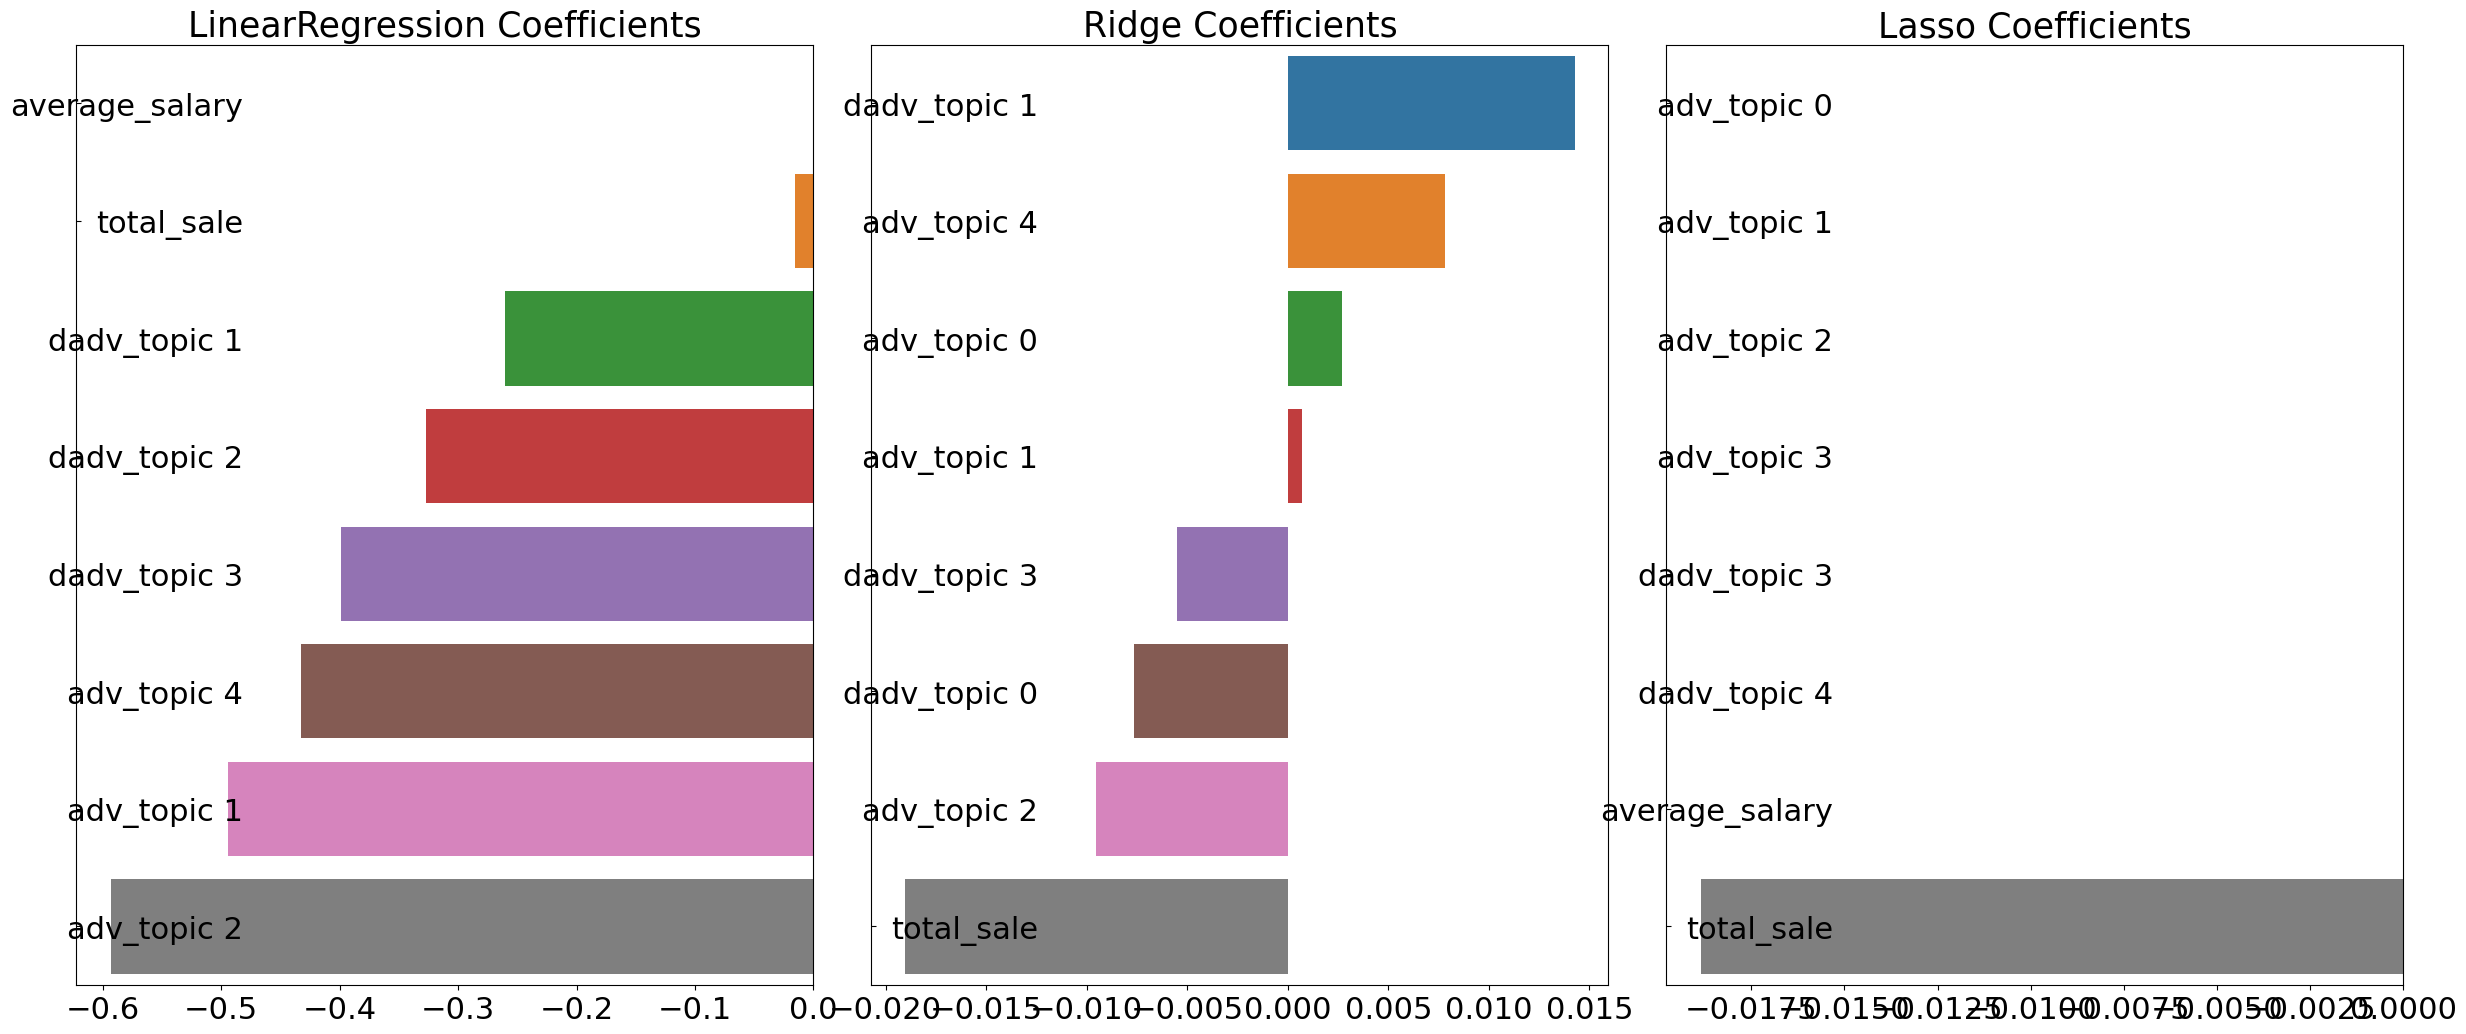

In [81]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=20)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.005)
lasso_reg.fit(X_train,y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

visualize_coefficient(models)

**Decision Tree with Regression**

In [82]:
from xgboost import XGBRegressor 

xgb_params = {'n_estimators': [1000]}
xgb_reg = XGBRegressor(n_estimators = 1000, learning_rate = 0.05, colsample_bytree = 0.5, subsample = 0.8)
print_best_params(xgb_reg, xgb_params)

XGBRegressor After 5 CV, best average RMSE: 0.1564, best alpha: {'n_estimators': 1000}


In [83]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators': [1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate= 0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
print_best_params(lgbm_reg,lgbm_params)

LGBMRegressor After 5 CV, best average RMSE: 0.1686, best alpha: {'n_estimators': 1000}


In [84]:
from sklearn.ensemble import GradientBoostingRegressor

gb_params = {'n_estimators': [1000]}
gb_reg = LGBMRegressor(n_estimators=1000, learning_rate= 0.05, subsample=0.6 )
print_best_params(gb_reg,gb_params)


LGBMRegressor After 5 CV, best average RMSE: 0.1769, best alpha: {'n_estimators': 1000}


In [85]:
from sklearn.ensemble import RandomForestRegressor

rf_params = {'n_estimators': [1000]}
rf_reg = RandomForestRegressor(n_estimators=1000)
print_best_params(rf_reg,rf_params)

RandomForestRegressor After 5 CV, best average RMSE: 0.1565, best alpha: {'n_estimators': 1000}


In [86]:
from sklearn.tree import DecisionTreeRegressor

dt_params = {}
dt_reg = DecisionTreeRegressor(max_depth=4)
print_best_params(dt_reg, dt_params)

DecisionTreeRegressor After 5 CV, best average RMSE: 0.2258, best alpha: {}


<Axes: >

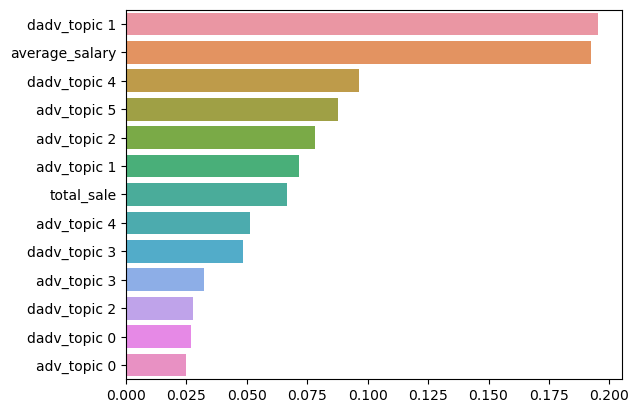

In [87]:
# Feature graph xgb
xgb_reg.fit(x_data, y_target)

feature_series = pd.Series(data = xgb_reg.feature_importances_, index =x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y= feature_series.index)

<Axes: >

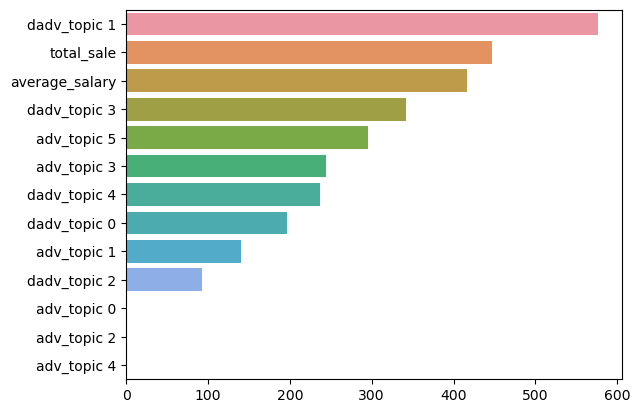

In [88]:
# Feature Graph lgbm
lgbm_reg.fit(x_data, y_target.astype('float'))

feature_series = pd.Series(data = lgbm_reg.feature_importances_, index =x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y= feature_series.index)


<Axes: >

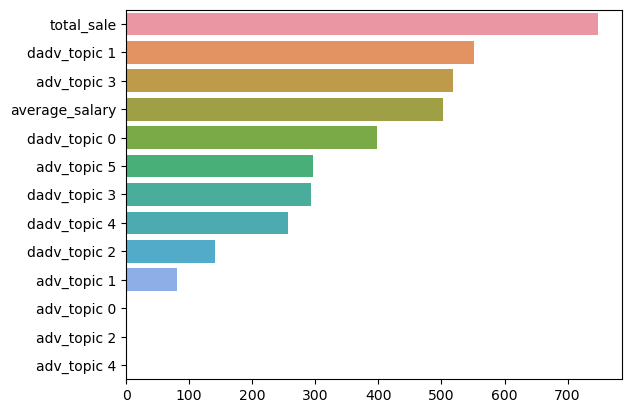

In [89]:
# Feature graph gradient boosting

gb_reg.fit(x_data, y_target.astype('float'))

feature_series = pd.Series(data = gb_reg.feature_importances_, index =x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y= feature_series.index)

<Axes: >

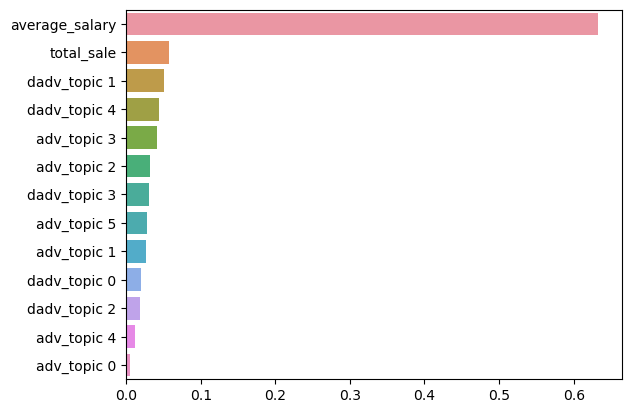

In [90]:
# Feature graph randomforest

rf_reg.fit(x_data, y_target)

feature_series = pd.Series(data = rf_reg.feature_importances_, index =x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y= feature_series.index)


<Axes: >

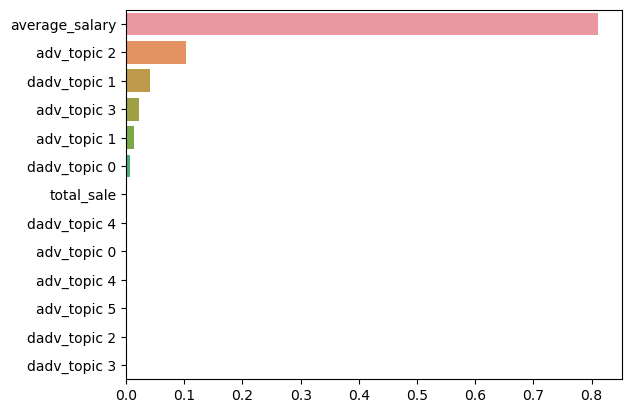

In [91]:
# Feature Graph DecisionTree
dt_reg.fit(x_data, y_target.astype('float'))

feature_series = pd.Series(data = dt_reg.feature_importances_, index =x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y= feature_series.index)

Combination of Regression Model

In [92]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test, pred_value)
        rmse = np.sqrt(mse)
        print('{0} model\'s RMSE: {1}'.format(key, rmse))

# single model
ridge_reg = Ridge(alpha = 20)
ridge_reg.fit(X_train,y_train)
lasso_reg = Lasso(alpha = 0.05)
lasso_reg.fit(X_train,y_train)

ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

pred = 0.5 * ridge_pred + 0.5 * lasso_pred

preds = {'final combined': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}

get_rmse_pred(preds)

final combined model's RMSE: 0.1100811550694346
Ridge model's RMSE: 0.10799994845963293
Lasso model's RMSE: 0.11287415954076192


In [93]:
# xgb boost and random forest

xgb_reg = XGBRegressor(n_estimators = 1000, learning_rate = 0.05, colsample_bytree = 0.5, subsample = 0.8)
rf_reg = RandomForestRegressor(n_estimators=1000)

xgb_reg.fit(X_train,y_train)
rf_reg.fit(X_train,y_train)

xgb_pred = xgb_reg.predict(X_test)
rf_pred = rf_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * rf_pred
preds = {'final combined': pred,
         'XGBoost': xgb_pred,
         'RandomForest': rf_pred}

get_rmse_pred(preds)


final combined model's RMSE: 0.1196492728500064
XGBoost model's RMSE: 0.124050862680418
RandomForest model's RMSE: 0.12060756216755235


Stacking Ensemble

In [94]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):

    kf = KFold(n_splits=n_folds, shuffle=False)

    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__,' model start ')

    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):

        print('\t fold set: ', folder_counter, ' start')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        model.fit(X_tr, y_tr)

        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)

        test_pred[:, folder_counter] = model.predict(X_test_n)

    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    return train_fold_pred, test_pred_mean

In [95]:
X_train_n = X_train.values
X_test_n = X_test.values

y_train_n = y_train.values

ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
rf_train, rf_test = get_stacking_base_datasets(rf_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model start 
	 fold set:  0  start
	 fold set:  1  start
	 fold set:  2  start
	 fold set:  3  start
	 fold set:  4  start
Lasso  model start 
	 fold set:  0  start
	 fold set:  1  start
	 fold set:  2  start
	 fold set:  3  start
	 fold set:  4  start
XGBRegressor  model start 
	 fold set:  0  start
	 fold set:  1  start
	 fold set:  2  start
	 fold set:  3  start
	 fold set:  4  start
RandomForestRegressor  model start 
	 fold set:  0  start
	 fold set:  1  start
	 fold set:  2  start
	 fold set:  3  start
	 fold set:  4  start


In [96]:
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, rf_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, rf_test),axis=1)

meta_model_lasso = Lasso(alpha = 0.005)

meta_model_lasso.fit(Stack_final_X_train,y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('Stacking regression model\'s final RMSE: ',rmse)

Stacking regression model's final RMSE:  0.10764239663112271
